In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
WheatPriceUs = pd.read_csv('Wheat-US-Price.csv',header = 1)


In [3]:
# WheatPriceUs.loc[:, 'Month'] = pd.to_datetime(WheatPriceUs['Month'],format='%Y-%m')

In [4]:
WheatPriceUs.head()

,Month,Price,Change,Production
0,9-May,261.48,-,60117
1,9-Jun,256.64,-1.85%,60117
2,9-Jul,224.85,-12.39%,60117
3,9-Aug,210.37,-6.44%,60117
4,9-Sep,191.09,-9.16%,60117


In [5]:
WheatPriceUs['Month']

0       9-May
1       9-Jun
2       9-Jul
3       9-Aug
4       9-Sep
        ...  
115    18-Dec
116    19-Jan
117    19-Feb
118    19-Mar
119    19-Apr
Name: Month, Length: 120, dtype: object

In [5]:
WheatPriceUs['year']= WheatPriceUs['Month'].apply(lambda x:x.split('-')[0])
WheatPriceUs['Month']= WheatPriceUs['Month'].apply(lambda x:x.split('-')[1])
WheatPriceUs['year'] = pd.to_numeric(WheatPriceUs['year'])+2000
WheatPriceUs['Month']= WheatPriceUs['Month'].apply(lambda x:x.lower())

In [6]:
WheatPriceUs.head()

,Month,Price,Change,Production,year
0,may,261.48,-,60117,2009
1,jun,256.64,-1.85%,60117,2009
2,jul,224.85,-12.39%,60117,2009
3,aug,210.37,-6.44%,60117,2009
4,sep,191.09,-9.16%,60117,2009


In [7]:
WheatPriceUs.shape

(120, 5)

In [8]:
oilUs = pd.read_csv('oil_us.csv')

In [9]:
oilUs

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2009,43.44,43.32,46.54,50.18,57.30,68.61,64.44,72.51,67.65,72.77,76.66,74.46
1,2010,76.17,73.75,78.83,84.82,75.95,74.76,75.58,77.04,77.84,82.67,85.28,91.45
2,2011,96.52,103.72,114.64,123.26,114.99,113.83,116.97,110.22,112.83,109.55,110.77,107.87
3,2012,110.69,119.33,125.45,119.75,110.34,95.16,102.62,113.36,112.86,111.71,109.06,109.49
4,2013,112.96,116.05,108.47,102.25,102.56,102.92,107.93,111.28,111.60,109.08,107.79,110.76
5,2014,108.12,108.90,107.48,107.76,109.54,111.80,106.77,101.61,97.09,87.43,79.44,62.34
6,2015,47.76,58.10,55.89,59.52,64.08,61.48,56.56,46.52,47.62,48.43,44.27,38.01
7,2016,30.70,32.18,38.21,41.58,46.74,48.25,44.95,45.84,46.57,49.52,44.73,53.31
8,2017,54.58,54.87,51.59,52.31,50.33,46.37,48.48,51.70,56.15,57.51,62.71,64.37
9,2018,69.08,65.32,66.02,72.11,76.98,74.41,74.25,72.53,78.89,81.03,64.75,57.36


In [10]:
oilUs.columns
listmonth = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']

In [11]:
MonthOil = pd.DataFrame()
for m in listmonth :
    temp = oilUs[['year',m]]
    temp = temp.rename(columns={m:'oilPrice'})
    temp['Month'] = [m]*11
    
    MonthOil = pd.concat([MonthOil,temp])

In [12]:
MonthOil

,year,oilPrice,Month
0,2009,43.44,jan
1,2010,76.17,jan
2,2011,96.52,jan
3,2012,110.69,jan
4,2013,112.96,jan
5,2014,108.12,jan
6,2015,47.76,jan
7,2016,30.70,jan
8,2017,54.58,jan
9,2018,69.08,jan


In [13]:
MonthOil = MonthOil.dropna()

In [14]:
MonthOil

,year,oilPrice,Month
0,2009,43.44,jan
1,2010,76.17,jan
2,2011,96.52,jan
3,2012,110.69,jan
4,2013,112.96,jan
5,2014,108.12,jan
6,2015,47.76,jan
7,2016,30.70,jan
8,2017,54.58,jan
9,2018,69.08,jan


In [15]:
weatherUs = pd.read_csv('weather-kansas.csv')

In [16]:
weatherUs

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual
0,2009,27.5,36.8,45.2,53.0,64.7,74.8,73.5,74.0,67.0,50.6,49.9,28.5,53.8
1,2010,23.8,27.3,45.5,60.4,64.0,77.6,80.4,81.2,69.2,58.6,44.7,29.3,55.2
2,2011,22.8,29.5,43.5,55.8,63.0,76.0,83.2,78.1,64.8,58.3,45.4,35.9,54.7
3,2012,35.1,38.1,58.4,59.0,69.6,77.3,85.2,76.9,67.5,54.7,46.8,35.9,58.7
4,2013,32.8,32.4,37.8,49.9,62.7,73.4,76.6,75.9,71.5,55.1,40.9,28.1,53.1
5,2014,24.5,24.7,40.1,53.6,66.0,74.0,73.9,77.5,66.9,57.6,37.5,34.3,52.5
6,2015,31.2,25.2,46.7,56.8,63.5,74.8,77.5,74.5,72.9,58.4,48.2,39.7,55.8
7,2016,29.6,39.1,50.5,57.1,62.7,78.6,78.6,77.0,71.4,61.8,51.2,30.1,57.3
8,2017,32.3,43.6,48.0,57.0,63.8,74.6,79.1,71.8,71.1,57.7,44.8,32.1,56.3
9,2018,28.4,32.3,43.6,47.4,73.4,77.8,78.9,77.3,70.6,55.5,35.6,34.8,54.6


In [17]:
weatherUs.columns

Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec', 'annual'],
      dtype='object')

In [18]:
Month = pd.DataFrame()
for m in listmonth :
    temp = weatherUs[['year',m]]
    temp = temp.rename(columns={m:'Weather'})
    temp['Month'] = [m]*11
    
    Month = pd.concat([Month,temp])


In [19]:
Month = Month.dropna()

In [20]:
Month

,year,Weather,Month
0,2009,27.5,jan
1,2010,23.8,jan
2,2011,22.8,jan
3,2012,35.1,jan
4,2013,32.8,jan
5,2014,24.5,jan
6,2015,31.2,jan
7,2016,29.6,jan
8,2017,32.3,jan
9,2018,28.4,jan


In [21]:
Month = pd.merge(Month,MonthOil,how='left',on=['year','Month'])

In [22]:
Month.head()

,year,Weather,Month,oilPrice
0,2009,27.5,jan,43.44
1,2010,23.8,jan,76.17
2,2011,22.8,jan,96.52
3,2012,35.1,jan,110.69
4,2013,32.8,jan,112.96


In [23]:
Final = pd.merge(WheatPriceUs,Month,on=["year",'Month'],how="left")

In [24]:
Final['Change'][0] = '0%'

In [25]:
Final['Change'] = Final['Change'].apply(lambda x:x.replace("%", ""))

In [26]:
Final['Change'] = pd.to_numeric(Final['Change'])

In [27]:
thisdict = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

In [28]:
Final['Month'] = Final.replace({"Month": thisdict})
Final['Month'] = Final['Month'].astype(int)

In [29]:
Final.columns

Index(['Month', 'Price', 'Change', 'Production', 'year', 'Weather',
       'oilPrice'],
      dtype='object')

In [30]:
Final['Month'] = Final['Month'].astype(str)
Final['year'] = Final['year'].astype(str)

In [31]:
Final['date'] = Final['year']+'-'+Final['Month']

In [32]:
Final.loc[:, 'date'] = pd.to_datetime(Final['date'],format='%Y-%m')

In [33]:
Final['Month'] = Final['Month'].astype(int)
Final['year'] = Final['year'].astype(int)

In [34]:
Final

,Month,Price,Change,Production,year,Weather,oilPrice,date
0,5,261.48,0.00,60117,2009,64.7,57.30,2009-05-01
1,6,256.64,-1.85,60117,2009,74.8,68.61,2009-06-01
2,7,224.85,-12.39,60117,2009,73.5,64.44,2009-07-01
3,8,210.37,-6.44,60117,2009,74.0,72.51,2009-08-01
4,9,191.09,-9.16,60117,2009,67.0,67.65,2009-09-01
5,10,198.85,4.06,60117,2009,50.6,72.77,2009-10-01
6,11,211.04,6.13,60117,2009,49.9,76.66,2009-11-01
7,12,206.25,-2.27,60117,2009,28.5,74.46,2009-12-01
8,1,201.19,-2.45,58868,2010,23.8,76.17,2010-01-01
9,2,194.00,-3.57,58868,2010,27.3,73.75,2010-02-01


In [35]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 8 columns):
Month         120 non-null int64
Price         120 non-null float64
Change        120 non-null float64
Production    120 non-null int64
year          120 non-null int64
Weather       120 non-null float64
oilPrice      120 non-null float64
date          120 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 13.4 KB


In [36]:
from datapackage import Package

package = Package('https://datahub.io/core/gold-prices/datapackage.json')

print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        a = (resource.read())


['validation_report', 'annual_csv', 'monthly_csv', 'annual_json', 'monthly_json', 'gold-prices_zip', 'annual', 'monthly']


In [37]:
a[0][1]

Decimal('34.730')

In [38]:
year=[]
[year.append(i[0].year) for i in a]
month=[]
[month.append(i[0].month) for i in a]
price=[]
price = [float(i[1]) for i in a]
gold = pd.DataFrame(year,columns = ['year'])
gold['Month'] = month
gold['goldPrice'] = price
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 3 columns):
year         833 non-null int64
Month        833 non-null int64
goldPrice    833 non-null float64
dtypes: float64(1), int64(2)
memory usage: 19.6 KB


In [39]:
Final = pd.merge(Final,gold,on=["year",'Month'],how="left")
Final.head()

,Month,Price,Change,Production,year,Weather,oilPrice,date,goldPrice
0,5,261.48,0.00,60117,2009,64.7,57.30,2009-05-01,926.855
1,6,256.64,-1.85,60117,2009,74.8,68.61,2009-06-01,947.807
2,7,224.85,-12.39,60117,2009,73.5,64.44,2009-07-01,934.272
3,8,210.37,-6.44,60117,2009,74.0,72.51,2009-08-01,949.500
4,9,191.09,-9.16,60117,2009,67.0,67.65,2009-09-01,996.443


In [40]:
Final.to_csv('data.csv',index = False)

In [40]:
df = Final

In [41]:
df_corr = df.corrwith(df['Price']).abs().sort_values(ascending=False)
df_corr

Price         1.000000
oilPrice      0.868346
goldPrice     0.626300
year          0.480487
Production    0.182393
Change        0.132505
Weather       0.020493
Month         0.007063
dtype: float64

Text(0.5, 1.0, 'Without scaling')

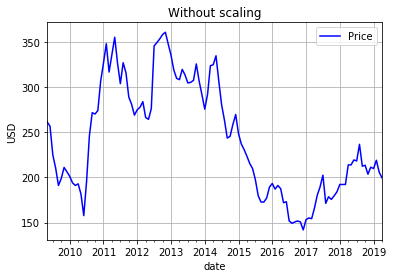

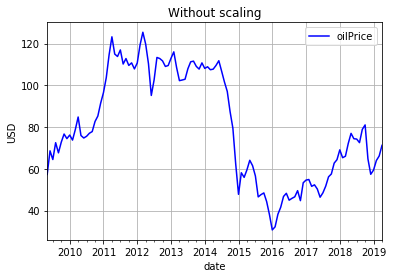

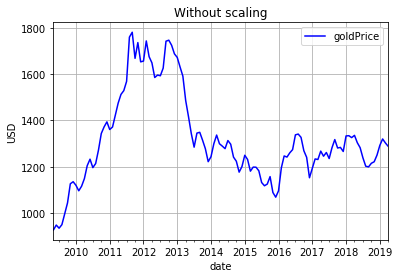

In [42]:
# rcParams['figure.figsize'] = 10, 8 # width 10, height 8

# fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = df.plot(x='date', y='Price', style='b-', grid=True)
ax1.set_xlabel("date")
ax1.set_ylabel("USD")
ax1.set_title("Without scaling")
ax2 = df.plot(x='date', y='oilPrice', style='b-', grid=True)
ax2.set_xlabel("date")
ax2.set_ylabel("USD")
ax2.set_title("Without scaling")
ax3 = df.plot(x='date', y='goldPrice', style='b-', grid=True)
ax3.set_xlabel("date")
ax3.set_ylabel("USD")
ax3.set_title("Without scaling")




In [43]:
import pandas as pd
import seaborn as sns
import time
import math
from datetime import date
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook
from xgboost import XGBRegressor

%matplotlib inline

#### Input params ##################
test_size = 0.2              # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 2                         # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 3                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14

In [44]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() # len(mean_list) = len(df)
    std_list = df[col].rolling(window = N, min_periods=1).std()   # first value will be NaN, because normalized by N-1
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

def scale_row(row, feat_mean, feat_std):
    """
    Given a pandas series in row, scale it to have 0 mean and var 1 using feat_mean and feat_std
    Inputs
        row      : pandas series. Need to scale this.
        feat_mean: mean  
        feat_std : standard deviation
    Outputs
        row_scaled : pandas series with same length as row, but scaled
    """
    # If feat_std = 0 (this happens if adj_close doesn't change over N days), 
    # set it to a small number to avoid division by zero
    feat_std = 0.001 if feat_std == 0 else feat_std
    
    row_scaled = (row-feat_mean) / feat_std
    
    return row_scaled

def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          seed=100, \
                          n_estimators=100, \
                          max_depth=3, \
                          learning_rate=0.1, \
                          min_child_weight=1, \
                          subsample=1, \
                          colsample_bytree=1, \
                          colsample_bylevel=1, \
                          gamma=0):
    '''
    Train model, do prediction, scale back to original range and do evaluation
    Use XGBoost here.
    Inputs
        X_train_scaled     : features for training. Scaled to have mean 0 and variance 1
        y_train_scaled     : target for training. Scaled to have mean 0 and variance 1
        X_test_scaled      : features for test. Each sample is scaled to mean 0 and variance 1
        y_test             : target for test. Actual values, not scaled.
        col_mean           : means used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        col_std            : standard deviations used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        seed               : model seed
        n_estimators       : number of boosted trees to fit
        max_depth          : maximum tree depth for base learners
        learning_rate      : boosting learning rate (xgb’s “eta”)
        min_child_weight   : minimum sum of instance weight(hessian) needed in a child
        subsample          : subsample ratio of the training instance
        colsample_bytree   : subsample ratio of columns when constructing each tree
        colsample_bylevel  : subsample ratio of columns for each split, in each level
        gamma              : 
    Outputs
        rmse               : root mean square error of y_test and est
        mape               : mean absolute percentage error of y_test and est
        est                : predicted values. Same length as y_test
    '''

    model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)
    
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

In [45]:
# Add a column 'order_day' to indicate the order of the rows by date
df['order_day'] = [x for x in list(range(len(df)))]

# merging_keys
merging_keys = ['order_day']

# List of columns that we will use to create lags
lag_cols = ['Month', 'Price', 'Change', 'Weather','oilPrice','goldPrice']
lag_cols

['Month', 'Price', 'Change', 'Weather', 'oilPrice', 'goldPrice']

In [46]:
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = df[merging_keys + lag_cols].copy()
    
    # E.g. order_day of 0 becomes 1, for shift = 1.
    # So when this is merged with order_day of 1 in df, this will represent lag of 1.
    train_shift['order_day'] = train_shift['order_day'] + shift
    
    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    df = pd.merge(df, train_shift, on=merging_keys, how='left') #.fillna(0)
    
del train_shift

# Remove the first N rows which contain NaNs
df = df[N:]
    
df.head()

,Month,Price,Change,Production,year,Weather,oilPrice,date,goldPrice,order_day,...,Change_lag_1,Weather_lag_1,oilPrice_lag_1,goldPrice_lag_1,Month_lag_2,Price_lag_2,Change_lag_2,Weather_lag_2,oilPrice_lag_2,goldPrice_lag_2
2,7,224.85,-12.39,60117,2009,73.5,64.44,2009-07-01,934.272,2,...,-1.85,74.8,68.61,947.807,5.0,261.48,0.00,64.7,57.30,926.855
3,8,210.37,-6.44,60117,2009,74.0,72.51,2009-08-01,949.500,3,...,-12.39,73.5,64.44,934.272,6.0,256.64,-1.85,74.8,68.61,947.807
4,9,191.09,-9.16,60117,2009,67.0,67.65,2009-09-01,996.443,4,...,-6.44,74.0,72.51,949.500,7.0,224.85,-12.39,73.5,64.44,934.272
5,10,198.85,4.06,60117,2009,50.6,72.77,2009-10-01,1043.511,5,...,-9.16,67.0,67.65,996.443,8.0,210.37,-6.44,74.0,72.51,949.500
6,11,211.04,6.13,60117,2009,49.9,76.66,2009-11-01,1126.119,6,...,4.06,50.6,72.77,1043.511,9.0,191.09,-9.16,67.0,67.65,996.443


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 2 to 119
Data columns (total 22 columns):
Month              118 non-null int64
Price              118 non-null float64
Change             118 non-null float64
Production         118 non-null int64
year               118 non-null int64
Weather            118 non-null float64
oilPrice           118 non-null float64
date               118 non-null datetime64[ns]
goldPrice          118 non-null float64
order_day          118 non-null int64
Month_lag_1        118 non-null float64
Price_lag_1        118 non-null float64
Change_lag_1       118 non-null float64
Weather_lag_1      118 non-null float64
oilPrice_lag_1     118 non-null float64
goldPrice_lag_1    118 non-null float64
Month_lag_2        118 non-null float64
Price_lag_2        118 non-null float64
Change_lag_2       118 non-null float64
Weather_lag_2      118 non-null float64
oilPrice_lag_2     118 non-null float64
goldPrice_lag_2    118 non-null float64
dtypes: datetime

In [48]:
cols_list = [
    # "Month",
    "Price",
    # "Change",
    "Weather",
    'oilPrice',
    'goldPrice'
]

for col in cols_list:
    df = get_mov_avg_std(df, col, N)
df.head()

,Month,Price,Change,Production,year,Weather,oilPrice,date,goldPrice,order_day,...,oilPrice_lag_2,goldPrice_lag_2,Price_mean,Price_std,Weather_mean,Weather_std,oilPrice_mean,oilPrice_std,goldPrice_mean,goldPrice_std
2,7,224.85,-12.39,60117,2009,73.5,64.44,2009-07-01,934.272,2,...,57.30,926.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,210.37,-6.44,60117,2009,74.0,72.51,2009-08-01,949.500,3,...,68.61,947.807,224.85,NaN,73.50,NaN,64.440,NaN,934.2720,NaN
4,9,191.09,-9.16,60117,2009,67.0,67.65,2009-09-01,996.443,4,...,64.44,934.272,217.61,10.238906,73.75,0.353553,68.475,5.706352,941.8860,10.767822
5,10,198.85,4.06,60117,2009,50.6,72.77,2009-10-01,1043.511,5,...,72.51,949.500,200.73,13.633019,70.50,4.949747,70.080,3.436539,972.9715,33.193714
6,11,211.04,6.13,60117,2009,49.9,76.66,2009-11-01,1126.119,6,...,67.65,996.443,194.97,5.487149,58.80,11.596551,70.210,3.620387,1019.9770,33.282102


In [49]:
df['Month'] = df['Month'].astype(int)


In [50]:
# Get sizes of each of the datasets
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))
train_cv.head()

num_train = 72
num_cv = 23
num_test = 23
train.shape = (72, 30)
cv.shape = (23, 30)
train_cv.shape = (95, 30)
test.shape = (23, 30)


,Month,Price,Change,Production,year,Weather,oilPrice,date,goldPrice,order_day,...,oilPrice_lag_2,goldPrice_lag_2,Price_mean,Price_std,Weather_mean,Weather_std,oilPrice_mean,oilPrice_std,goldPrice_mean,goldPrice_std
2,7,224.85,-12.39,60117,2009,73.5,64.44,2009-07-01,934.272,2,...,57.30,926.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,210.37,-6.44,60117,2009,74.0,72.51,2009-08-01,949.500,3,...,68.61,947.807,224.85,NaN,73.50,NaN,64.440,NaN,934.2720,NaN
4,9,191.09,-9.16,60117,2009,67.0,67.65,2009-09-01,996.443,4,...,64.44,934.272,217.61,10.238906,73.75,0.353553,68.475,5.706352,941.8860,10.767822
5,10,198.85,4.06,60117,2009,50.6,72.77,2009-10-01,1043.511,5,...,72.51,949.500,200.73,13.633019,70.50,4.949747,70.080,3.436539,972.9715,33.193714
6,11,211.04,6.13,60117,2009,49.9,76.66,2009-11-01,1126.119,6,...,67.65,996.443,194.97,5.487149,58.80,11.596551,70.210,3.620387,1019.9770,33.282102


In [51]:
cols_to_scale = [
"Price",'Month'
]

for i in range(1,N+1):
#     cols_to_scale.append("Month_lag_"+str(i))
    cols_to_scale.append("Price_lag_"+str(i))
#     cols_to_scale.append("Change_lag_"+str(i))
    cols_to_scale.append("Weather_lag_"+str(i))
    cols_to_scale.append("oilPrice_lag_"+str(i))
    cols_to_scale.append("goldPrice_lag_"+str(i))
# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['year','date']] = train.reset_index()[['year','date']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [ 277.91388889    6.5         278.56430556   54.61388889   95.88208333
 1373.30120833  279.20541667   54.63055556   95.78791667 1369.53969444]
scaler.var_ = [2.68693742e+03 1.19166667e+01 2.62838158e+03 3.34435363e+02
 3.81562475e+02 5.07067630e+04 2.57647099e+03 3.34751289e+02
 3.88181450e+02 5.30325142e+04]
train_scaled.shape = (72, 10)
train_scaled.shape = (72, 12)


,Price,Month,Price_lag_1,Weather_lag_1,oilPrice_lag_1,goldPrice_lag_1,Price_lag_2,Weather_lag_2,oilPrice_lag_2,goldPrice_lag_2,year,date
0,-1.023694,0.144841,-0.427643,1.103816,-1.396161,-1.889560,-0.349208,0.550357,-1.953471,-1.922310,2009,2009-07-01
1,-1.303039,0.434524,-1.047721,1.032729,-1.609639,-1.949667,-0.444560,1.102384,-1.379427,-1.831328,2009,2009-08-01
2,-1.674983,0.724207,-1.330160,1.060070,-1.196505,-1.882042,-1.070854,1.031331,-1.591077,-1.890102,2009,2009-09-01
3,-1.525279,1.013890,-1.706225,0.677297,-1.445307,-1.673574,-1.356124,1.058659,-1.181481,-1.823976,2009,2009-10-01
4,-1.290113,1.303572,-1.554863,-0.219487,-1.183195,-1.464552,-1.735958,0.676066,-1.428152,-1.620132,2009,2009-11-01


In [52]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
Price              72 non-null float64
Month              72 non-null float64
Price_lag_1        72 non-null float64
Weather_lag_1      72 non-null float64
oilPrice_lag_1     72 non-null float64
goldPrice_lag_1    72 non-null float64
Price_lag_2        72 non-null float64
Weather_lag_2      72 non-null float64
oilPrice_lag_2     72 non-null float64
goldPrice_lag_2    72 non-null float64
year               72 non-null int64
date               72 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 6.8 KB


In [53]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['year','date']] = train_cv.reset_index()[[ 'year','date']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [ 251.65484211    6.50526316  252.45726316   55.22947368   84.02452632
 1333.15753684  253.46147368   55.31052632   84.07705263 1329.57548421]
scaler_train_cv.var_ = [4.26207244e+03 1.20394460e+01 4.20826040e+03 3.17933237e+02
 7.42076861e+02 4.49657793e+04 4.12957173e+03 3.18837784e+02
 7.39004513e+02 4.66447877e+04]
train_cv_scaled.shape = (95, 10)
train_cv_scaled.shape = (95, 12)


,Price,Month,Price_lag_1,Weather_lag_1,oilPrice_lag_1,goldPrice_lag_1,Price_lag_2,Weather_lag_2,oilPrice_lag_2,goldPrice_lag_2,year,date
0,-0.410585,0.142584,0.064478,1.097576,-0.565856,-1.817251,0.124779,0.525843,-0.985007,-1.864671,2009,2009-07-01
1,-0.632383,0.430786,-0.425571,1.024668,-0.718933,-1.881080,0.049462,1.091479,-0.568963,-1.767659,2009,2009-08-01
2,-0.927706,0.718988,-0.648783,1.052709,-0.422690,-1.809267,-0.445233,1.018674,-0.722358,-1.830329,2009,2009-09-01
3,-0.808841,1.007190,-0.945988,0.660128,-0.601097,-1.587891,-0.670562,1.046676,-0.425500,-1.759820,2009,2009-10-01
4,-0.622120,1.295391,-0.826366,-0.259635,-0.413145,-1.365926,-0.970585,0.654651,-0.604277,-1.542465,2009,2009-11-01


In [54]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 74 to 96
Data columns (total 30 columns):
Month              23 non-null int64
Price              23 non-null float64
Change             23 non-null float64
Production         23 non-null int64
year               23 non-null int64
Weather            23 non-null float64
oilPrice           23 non-null float64
date               23 non-null datetime64[ns]
goldPrice          23 non-null float64
order_day          23 non-null int64
Month_lag_1        23 non-null float64
Price_lag_1        23 non-null float64
Change_lag_1       23 non-null float64
Weather_lag_1      23 non-null float64
oilPrice_lag_1     23 non-null float64
goldPrice_lag_1    23 non-null float64
Month_lag_2        23 non-null float64
Price_lag_2        23 non-null float64
Change_lag_2       23 non-null float64
Weather_lag_2      23 non-null float64
oilPrice_lag_2     23 non-null float64
goldPrice_lag_2    23 non-null float64
Price_mean         23 non-null float64


In [55]:
# Do scaling for dev set
cols_list = [
    "Month",
    "Price",
    # "Change",
    "Weather",
    'oilPrice',
    'goldPrice'
]
# cv_scaled = cv[['Month']]
# for col in tqdm_notebook(cols_list):
#     feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
#     temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
#     cv_scaled = pd.concat([cv_scaled, temp], axis=1)

# # Do scaling for dev set
scaler_cv = StandardScaler()
cv_scaled = scaler_cv.fit_transform(cv[cols_to_scale])

# Convert the numpy array back into pandas datafram
cv_scaled = pd.DataFrame(cv_scaled, columns=cols_to_scale)
cv_scaled[[ 'year','date']] = cv.reset_index()[['year','date']]
print("cv_scaled.shape = " + str(cv_scaled.shape))
# Now the entire dev set is scaled
cv_scaled.head()


cv_scaled.shape = (23, 12)


,Price,Month,Price_lag_1,Weather_lag_1,oilPrice_lag_1,goldPrice_lag_1,Price_lag_2,Weather_lag_2,oilPrice_lag_2,goldPrice_lag_2,year,date
0,1.673274,0.135689,2.115850,1.091321,2.008525,-0.321695,2.066228,0.373699,2.083708,-0.087628,2015,2015-07-01
1,0.614315,0.419402,1.439066,1.258327,1.330509,-0.967421,1.798021,1.070429,1.758579,-0.286950,2015,2015-08-01
2,0.195057,0.703115,0.484530,1.072765,-0.053086,-1.146541,1.189566,1.236905,1.143334,-0.941216,2015,2015-09-01
3,0.195657,0.986827,0.106614,0.973798,0.098503,-1.052489,0.331402,1.051932,-0.112164,-1.122706,2015,2015-10-01
4,0.459346,1.270540,0.107155,0.076914,0.210128,-0.641895,-0.008360,0.953280,0.025391,-1.027409,2015,2015-11-01


In [56]:
# Do scaling for test set
scaler_test= StandardScaler()
test_scaled = scaler_test.fit_transform(test[cols_to_scale])

# Convert the numpy array back into pandas dataframe
test_scaled = pd.DataFrame(test_scaled, columns=cols_to_scale)
test_scaled[['year','date']] = test.reset_index()[['year','date']]
print("test_scaled.shape = " + str(test_scaled.shape))

# Now the entire dev set is scaled
test_scaled.head()

test_scaled.shape = (23, 12)


,Price,Month,Price_lag_1,Weather_lag_1,oilPrice_lag_1,goldPrice_lag_1,Price_lag_2,Weather_lag_2,oilPrice_lag_2,goldPrice_lag_2,year,date
0,-0.725259,-0.160948,-1.194407,0.506695,-1.457107,-0.699996,-1.793908,0.110764,-1.153108,-0.147541,2017,2017-06-01
1,0.058508,0.123806,-0.652597,1.076470,-1.868915,-0.321139,-1.011691,0.473939,-1.352852,-0.669986,2017,2017-07-01
2,-1.844840,0.408561,0.105583,1.313875,-1.649492,-0.939928,-0.510046,1.050746,-1.752339,-0.287647,2017,2017-08-01
3,-1.397495,0.693316,-1.735628,0.928750,-1.314638,0.162106,0.191929,1.291082,-1.539481,-0.912123,2017,2017-09-01
4,-1.576677,0.978070,-1.302887,0.891820,-0.851874,0.997141,-1.512790,0.901203,-1.214645,0.200039,2017,2017-10-01


In [57]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
Price              23 non-null float64
Month              23 non-null float64
Price_lag_1        23 non-null float64
Weather_lag_1      23 non-null float64
oilPrice_lag_1     23 non-null float64
goldPrice_lag_1    23 non-null float64
Price_lag_2        23 non-null float64
Weather_lag_2      23 non-null float64
oilPrice_lag_2     23 non-null float64
goldPrice_lag_2    23 non-null float64
year               23 non-null int64
date               23 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 2.2 KB


In [58]:
train['Month'] = train['Month'].astype(int)
train_cv['Month'] = train_cv['Month'].astype(int)
cv['Month'] = cv['Month'].astype(int)
test['Month'] = test['Month'].astype(int)

In [59]:
features = ['Month']
for i in range(1,N+1):
#     features.append("Month_lag_"+str(i))
    features.append("Price_lag_"+str(i))
#     features.append("Change_lag_"+str(i))
    features.append("Weather_lag_"+str(i))
    features.append("oilPrice_lag_"+str(i))
    features.append("goldPrice_lag_"+str(i))

target = "Price"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

X_train.shape = (72, 9)
y_train.shape = (72,)
X_cv.shape = (23, 9)
y_cv.shape = (23,)
X_train_cv.shape = (95, 9)
y_train_cv.shape = (95,)
X_sample.shape = (23, 9)
y_sample.shape = (23,)


In [60]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (72, 9)
y_train_scaled.shape = (72,)
X_cv_scaled.shape = (23, 9)
X_train_cv_scaled.shape = (95, 9)
y_train_cv_scaled.shape = (95,)
X_sample_scaled.shape = (23, 9)


In [61]:
X_train_scaled.head()

,Month,Price_lag_1,Weather_lag_1,oilPrice_lag_1,goldPrice_lag_1,Price_lag_2,Weather_lag_2,oilPrice_lag_2,goldPrice_lag_2
0,0.144841,-0.427643,1.103816,-1.396161,-1.889560,-0.349208,0.550357,-1.953471,-1.922310
1,0.434524,-1.047721,1.032729,-1.609639,-1.949667,-0.444560,1.102384,-1.379427,-1.831328
2,0.724207,-1.330160,1.060070,-1.196505,-1.882042,-1.070854,1.031331,-1.591077,-1.890102
3,1.013890,-1.706225,0.677297,-1.445307,-1.673574,-1.356124,1.058659,-1.181481,-1.823976
4,1.303572,-1.554863,-0.219487,-1.183195,-1.464552,-1.735958,0.676066,-1.428152,-1.620132


Text(0.5, 1.0, 'Without scaling')

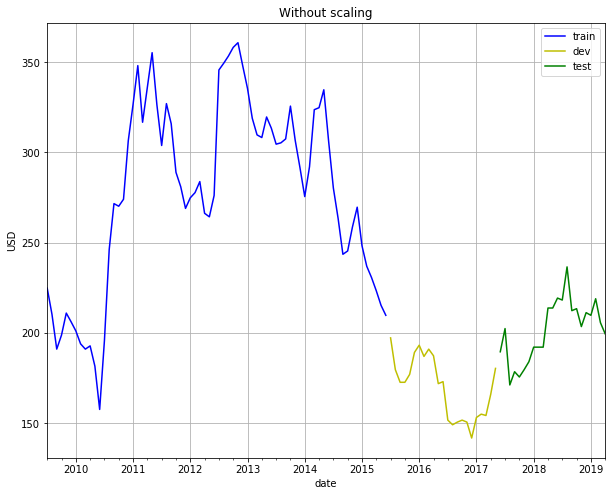

In [62]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

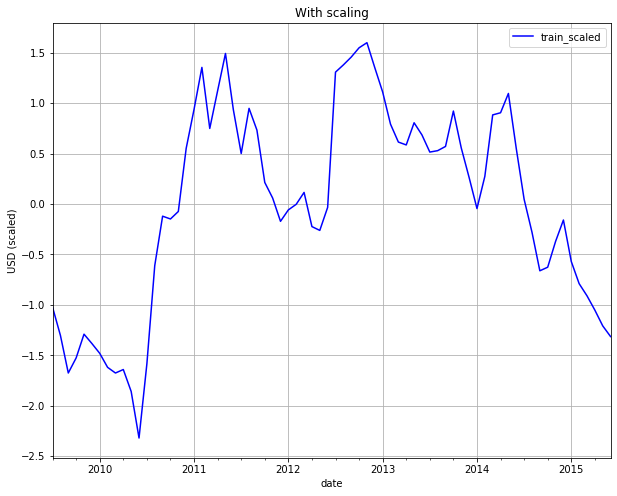

In [63]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='date', y='Price', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

In [64]:
# Create the model
model = XGBRegressor(seed=model_seed,
                     n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

# Train the regressor
model.fit(X_train_scaled, y_train_scaled)

[17:47:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
             silent=None, subsample=1, verbosity=1)

In [65]:
# Do prediction on train set
est_scaled = model.predict(X_train_scaled)
est = est_scaled * math.sqrt(scaler.var_[0]) + scaler.mean_[0]

# Calculate RMSE
print("RMSE on train set = %0.3f" % math.sqrt(mean_squared_error(y_train, est)))

# Calculate MAPE
print("MAPE on train set = %0.3f%%" % get_mape(y_train, est))

RMSE on train set = 2.407
MAPE on train set = 0.688%


Text(0.5, 1.0, 'Without scaling')

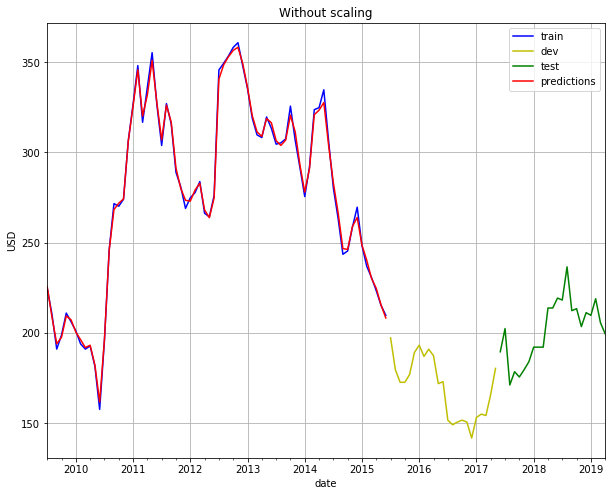

In [66]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est, 
                       'date': train['date']})

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title('Without scaling')

In [67]:
cv['Price_mean']

74    212.565
75    203.560
76    188.495
77    176.190
78    172.705
79    174.905
80    183.165
81    191.250
82    190.150
83    189.050
84    189.230
85    179.675
86    172.510
87    162.405
88    150.465
89    149.915
90    151.200
91    151.200
92    146.240
93    147.525
94    154.140
95    154.690
96    160.200
Name: Price_mean, dtype: float64

RMSE on dev set = 12.816
MAPE on dev set = 5.941%


Text(0, 0.5, 'USD')

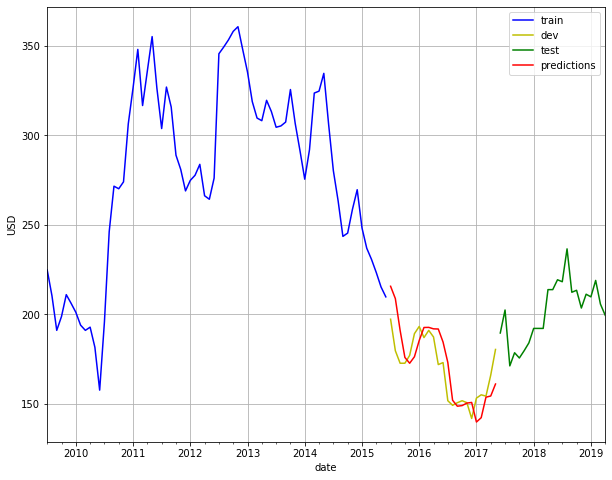

In [68]:

# Do prediction on test set
est_scaled = model.predict(X_cv_scaled)
cv['est_scaled'] = est_scaled
cv['est'] = cv['est_scaled'] * cv['Price_std'] + cv['Price_mean']

# Calculate RMSE
rmse_bef_tuning = math.sqrt(mean_squared_error(y_cv, cv['est']))
print("RMSE on dev set = %0.3f" % rmse_bef_tuning)

# Calculate MAPE
mape_bef_tuning = get_mape(y_cv, cv['est'])
print("MAPE on dev set = %0.3f%%" % mape_bef_tuning)
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': cv['est'], 
                       'y_cv': y_cv,
                       'date': cv['date']})

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to dev set')

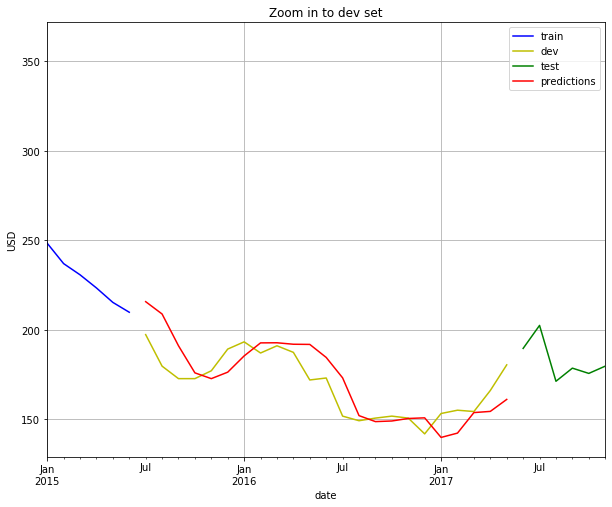

In [69]:
# Plot adjusted close over time, for dev set only
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2015, 1, 1), date(2017, 11, 1)])
ax.set_title("Zoom in to dev set")

# Features importance

In [70]:
# View a list of the features and their importance scores
imp = list(zip(train[features], model.feature_importances_))
imp.sort(key=lambda tup: tup[1]) 
imp[-10:]

[('Month', 0.004921217),
 ('Price_lag_2', 0.013300553),
 ('Weather_lag_2', 0.0136196595),
 ('oilPrice_lag_2', 0.018036414),
 ('oilPrice_lag_1', 0.026867336),
 ('Weather_lag_1', 0.03667257),
 ('goldPrice_lag_2', 0.06440938),
 ('goldPrice_lag_1', 0.11965303),
 ('Price_lag_1', 0.7025199)]

In [71]:
param_label = 'n_estimators'
param_list = range(2, 30, 1)

param2_label = 'max_depth'
param2_list = [2, 3, 4, 5, 6, 7, 8, 9]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Price_mean'],
                                     cv['Price_std'],
                                     seed=model_seed,
                                     n_estimators=param, 
                                     max_depth=param2, 
                                     learning_rate=learning_rate, 
                                     min_child_weight=min_child_weight, 
                                     subsample=subsample, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=gamma)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,n_estimators,max_depth,rmse,mape_pct
0,2,2,12.680689,5.795531
1,2,3,12.727057,5.812187
2,2,4,12.683954,5.788399
3,2,5,12.543804,5.746438
4,2,6,12.587126,5.761162
5,2,7,12.542453,5.746610
6,2,8,12.542453,5.746610
7,2,9,12.542453,5.746610
8,3,2,12.731346,5.829805
9,3,3,12.815976,5.862889


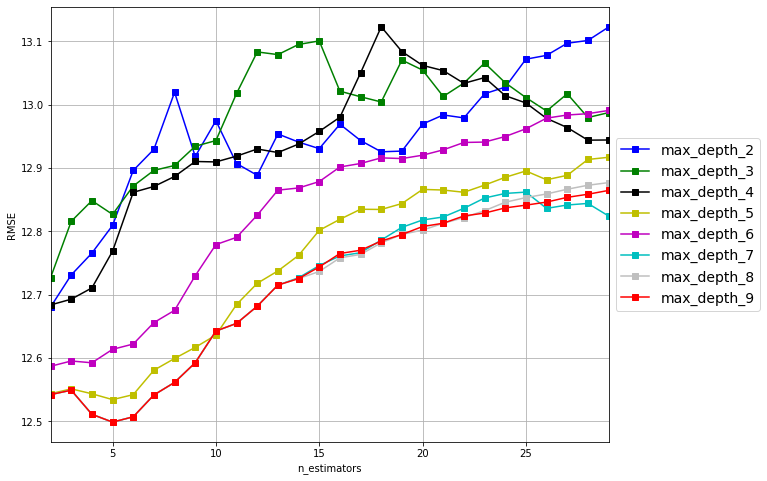

In [72]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [73]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
n_estimators_opt = temp['n_estimators'].values[0]
max_depth_opt = temp['max_depth'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
n_estimators_opt, max_depth_opt

min RMSE = 12.499
optimum params = 


(5, 7)

In [74]:
# Get optimum value for param and param2, using MAPE
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['n_estimators'].values[0], temp['max_depth'].values[0]

min MAPE = 5.681%
optimum params = 


(18, 8)

In [75]:
param_label = 'learning_rate'
param_list = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1]

param2_label = 'min_child_weight'
param2_list = range(10, 41, 1)

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Price_mean'],
                                     cv['Price_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=param, 
                                     min_child_weight=param2, 
                                     subsample=subsample, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=gamma)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,learning_rate,min_child_weight,rmse,mape_pct
0,0.005,10,12.758518,5.801806
1,0.005,11,12.757607,5.800419
2,0.005,12,12.757625,5.801430
3,0.005,13,12.751127,5.797294
4,0.005,14,12.774591,5.807924
5,0.005,15,12.768383,5.805947
6,0.005,16,12.768383,5.805947
7,0.005,17,12.768383,5.805947
8,0.005,18,12.768383,5.805947
9,0.005,19,12.768383,5.805947


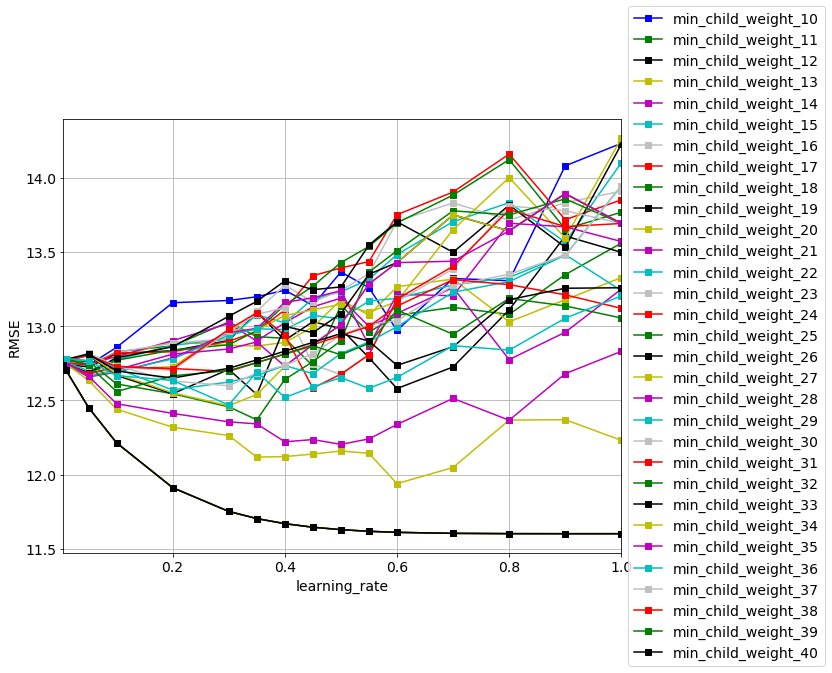

In [76]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [77]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
learning_rate_opt = temp['learning_rate'].values[0]
min_child_weight_opt = temp['min_child_weight'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
learning_rate_opt, min_child_weight_opt

min RMSE = 11.602
optimum params = 


(1.0, 37)

In [78]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['learning_rate'].values[0], temp['min_child_weight'].values[0]

min MAPE = 5.365%
optimum params = 


(1.0, 37)

In [79]:
param_label = 'subsample'
param_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'gamma'
param2_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Price_mean'],
                                     cv['Price_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=learning_rate_opt, 
                                     min_child_weight=min_child_weight_opt, 
                                     subsample=param, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=param2)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,subsample,gamma,rmse,mape_pct
0,0.1,0.1,11.400041,5.272584
1,0.1,0.2,11.400041,5.272584
2,0.1,0.3,11.400041,5.272584
3,0.1,0.4,11.400041,5.272584
4,0.1,0.5,11.400041,5.272584
5,0.1,0.6,11.400041,5.272584
6,0.1,0.7,11.400041,5.272584
7,0.1,0.8,11.400041,5.272584
8,0.1,0.9,11.400041,5.272584
9,0.1,1.0,11.400041,5.272584


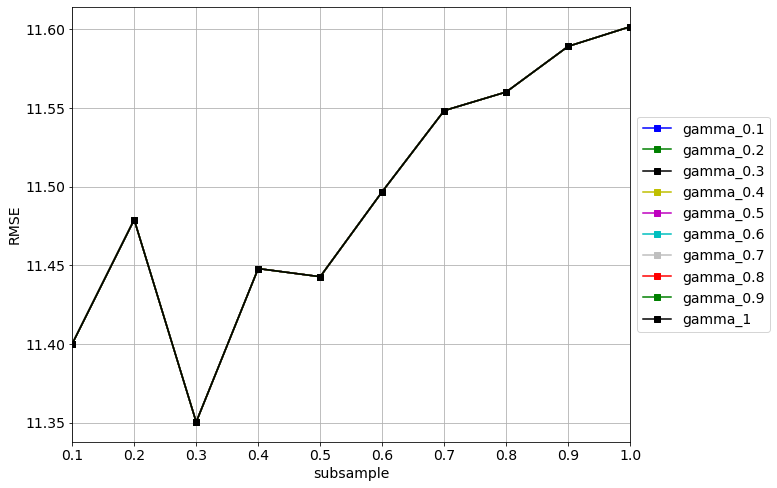

In [80]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [81]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
subsample_opt = temp['subsample'].values[0]
gamma_opt = temp['gamma'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
subsample_opt, gamma_opt

min RMSE = 11.350
optimum params = 


(0.3, 0.1)

In [82]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['subsample'].values[0], temp['gamma'].values[0]

min MAPE = 5.242%
optimum params = 


(0.3, 0.1)

In [83]:
param_label = 'colsample_bytree'
param_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'colsample_bylevel'
param2_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Price_mean'],
                                     cv['Price_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=learning_rate_opt, 
                                     min_child_weight=min_child_weight_opt, 
                                     subsample=subsample_opt, 
                                     colsample_bytree=param, 
                                     colsample_bylevel=param2, 
                                     gamma=gamma_opt)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,colsample_bytree,colsample_bylevel,rmse,mape_pct
0,0.5,0.5,11.350381,5.242251
1,0.5,0.6,11.350381,5.242251
2,0.5,0.7,11.350381,5.242251
3,0.5,0.8,11.350381,5.242251
4,0.5,0.9,11.350381,5.242251
5,0.5,1.0,11.350381,5.242251
6,0.6,0.5,11.350381,5.242251
7,0.6,0.6,11.350381,5.242251
8,0.6,0.7,11.350381,5.242251
9,0.6,0.8,11.350381,5.242251


In [84]:
d = {'param': ['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'subsample', 'gamma', 'rmse', 'mape_pct'],
     'original': [n_estimators, max_depth, learning_rate, min_child_weight, subsample, gamma, rmse_bef_tuning, mape_bef_tuning],
     'after_tuning': [n_estimators_opt, max_depth_opt, learning_rate_opt, min_child_weight_opt, subsample_opt, gamma_opt, error_rate['rmse'].min(), error_rate['mape_pct'].min()]}
tuned_params = pd.DataFrame(d)
tuned_params = tuned_params.round(3)
tuned_params

,param,original,after_tuning
0,n_estimators,100.000,5.000
1,max_depth,3.000,7.000
2,learning_rate,0.100,1.000
3,min_child_weight,1.000,37.000
4,subsample,1.000,0.300
5,gamma,0.000,0.100
6,rmse,12.816,11.350
7,mape_pct,5.941,5.242


In [85]:
n_estimators_opt

5

[17:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on dev set = 11.230
MAPE on dev set = 5.097%


Text(0, 0.5, 'USD')

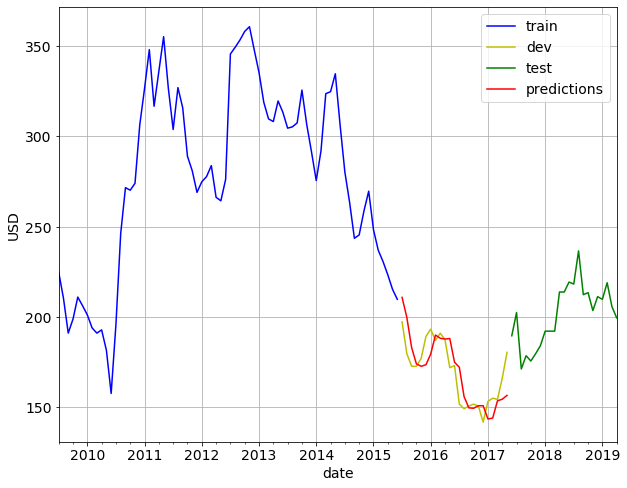

In [86]:
# Create the model
model = XGBRegressor(seed=model_seed,
                             n_estimators=n_estimators, 
                             max_depth=max_depth_opt, 
                             learning_rate=learning_rate_opt, 
                             min_child_weight=min_child_weight_opt, 
                             subsample=subsample_opt, 
                             gamma=gamma_opt)

# Train the regressor
model.fit(X_train_scaled, y_train_scaled)
# Do prediction on test set
est_scaled = model.predict(X_cv_scaled)
cv['est_scaled'] = est_scaled
cv['est'] = cv['est_scaled'] * cv['Price_std'] + cv['Price_mean']

# Calculate RMSE
rmse_bef_tuning = math.sqrt(mean_squared_error(y_cv, cv['est']))
print("RMSE on dev set = %0.3f" % rmse_bef_tuning)

# Calculate MAPE
mape_bef_tuning = get_mape(y_cv, cv['est'])
print("MAPE on dev set = %0.3f%%" % mape_bef_tuning)
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': cv['est'], 
                       'y_cv': y_cv,
                       'date': cv['date']})

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [87]:
rmse, mape, est = train_pred_eval_model(X_train_cv_scaled, 
                             y_train_cv_scaled, 
                             X_sample_scaled, 
                             y_sample, 
                             test['Price_mean'],
                             test['Price_std'],
                             seed=model_seed,
                             n_estimators=n_estimators, 
                             max_depth=max_depth_opt, 
                             learning_rate=learning_rate_opt, 
                             min_child_weight=min_child_weight_opt, 
                             subsample=subsample_opt, 
                             gamma=gamma_opt)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

[17:47:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE on test set = 12.235
MAPE on test set = 4.832%


Text(0, 0.5, 'USD')

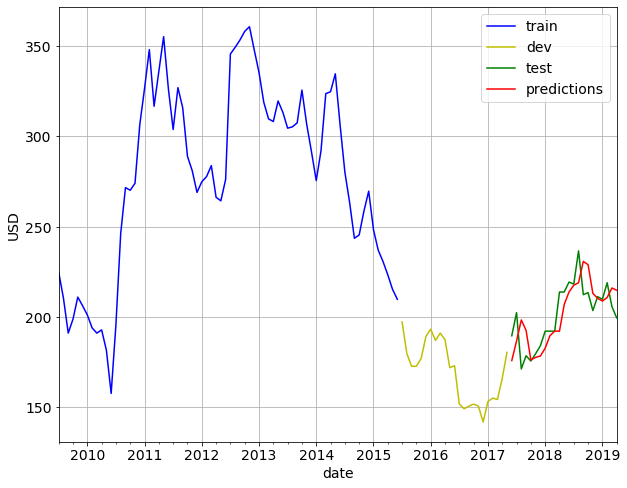

In [88]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est, 
                       'y_sample': y_sample,
                       'date': test['date']})

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

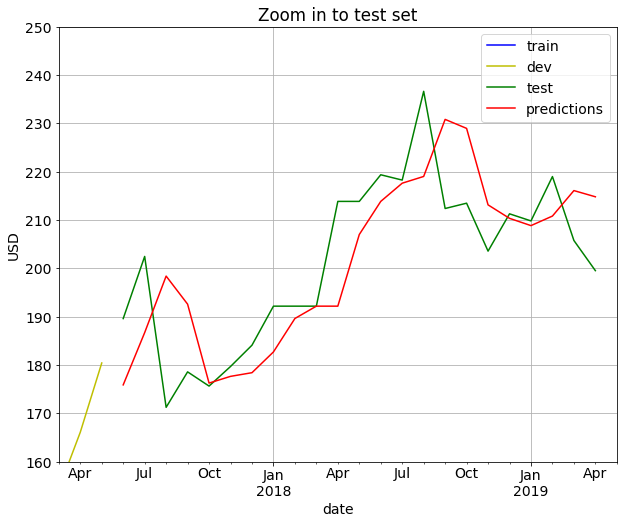

In [89]:
# Plot adjusted close over time, for test set only
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2017, 3, 1), date(2019, 5, 1)])
ax.set_ylim([160, 250])
ax.set_title("Zoom in to test set")

(566, 592)

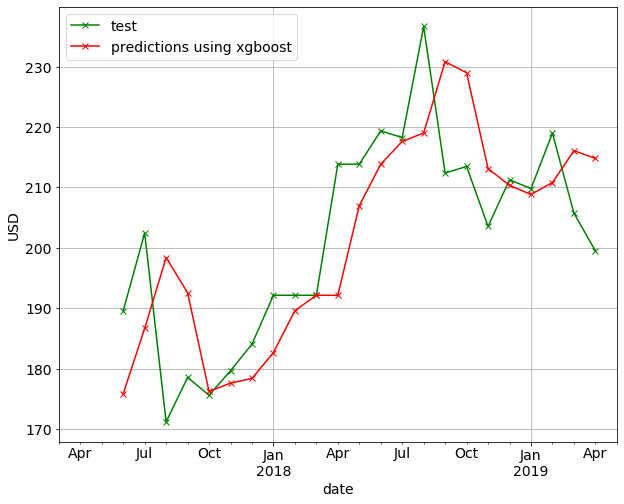

In [90]:
# Plot adjusted close over time, only for test set
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='Price', style='gx-', grid=True)
ax = est_df.plot(x='date', y='est', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using xgboost'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2017, 3, 1), date(2019, 5, 1)])

In [91]:
rmse,mape

(12.234561957845612, 4.831594786112913)

In [92]:
from sklearn.linear_model import Lasso
lasso_opt = Lasso(alpha =55 ,max_iter = 1000)
lasso_opt.fit(X_train, y_train)
est = lasso_opt.predict(X_sample)
rmse = math.sqrt(mean_squared_error(y_sample, est))
mape = get_mape(y_sample, est)
rmse,mape

(13.946199565649598, 5.4803993276688825)

Text(0, 0.5, 'USD')

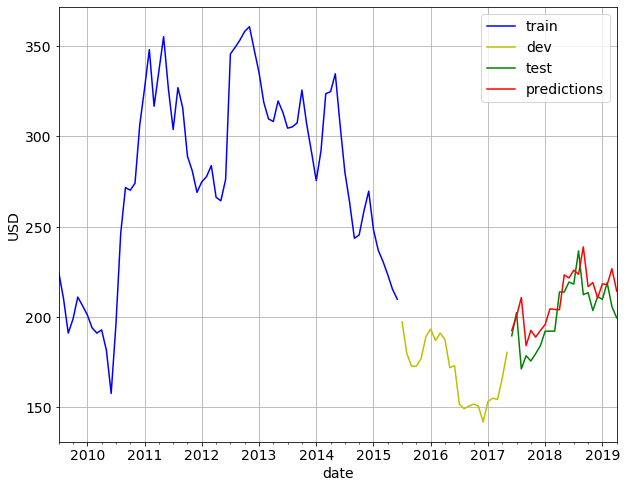

In [93]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est, 
                       'y_sample': y_sample,
                       'date': test['date']})

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

(566, 592)

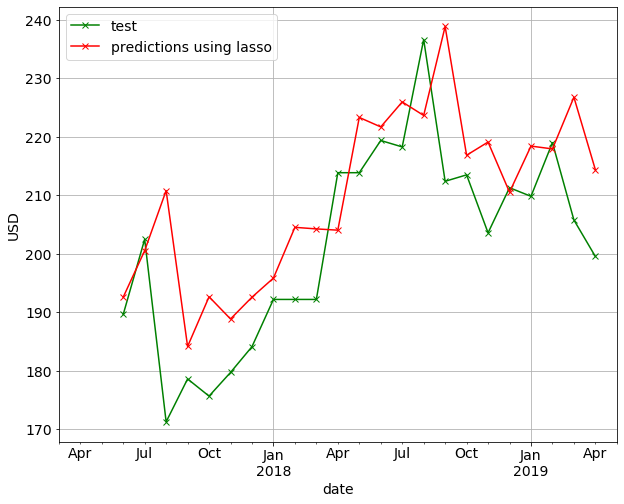

In [94]:
# Plot adjusted close over time, only for test set
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='Price', style='gx-', grid=True)
ax = est_df.plot(x='date', y='est', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using lasso'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2017, 3, 1), date(2019, 5, 1)])

In [95]:
from sklearn.linear_model import Lasso
lasso_opt = Lasso(alpha =55 ,max_iter = 1000)
lasso_opt.fit(X_train, y_train)
est = lasso_opt.predict(X_cv)
rmse = math.sqrt(mean_squared_error(y_cv, est))
mape = get_mape(y_cv, est)
rmse,mape

(16.172630342556563, 8.416292635559971)

Text(0, 0.5, 'USD')

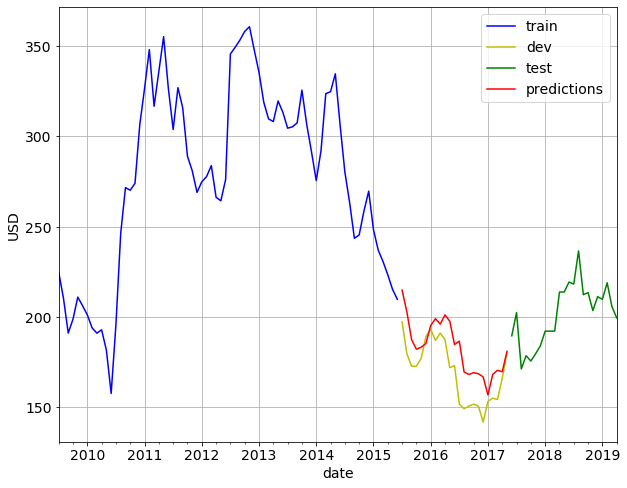

In [96]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est, 
                       'y_cv': y_cv,
                       'date': cv['date']})

ax = train.plot(x='date', y='Price', style='b-', grid=True)
ax = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

(542, 570)

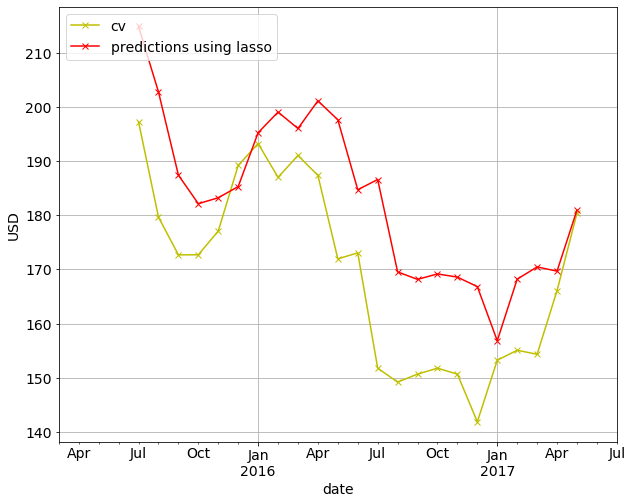

In [97]:
# Plot adjusted close over time, only for test set
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax = cv.plot(x='date', y='Price', style='yx-', grid=True)
ax = est_df.plot(x='date', y='est', style='rx-', grid=True, ax=ax)
ax.legend(['cv', 'predictions using lasso'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2015, 3, 1), date(2017, 7, 1)])

In [98]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
est = regr.predict(X_sample)
rmse = math.sqrt(mean_squared_error(y_sample, est))
mape = get_mape(y_sample, est)
rmse,mape

(14.145476910646236, 5.560837101249772)

(566, 592)

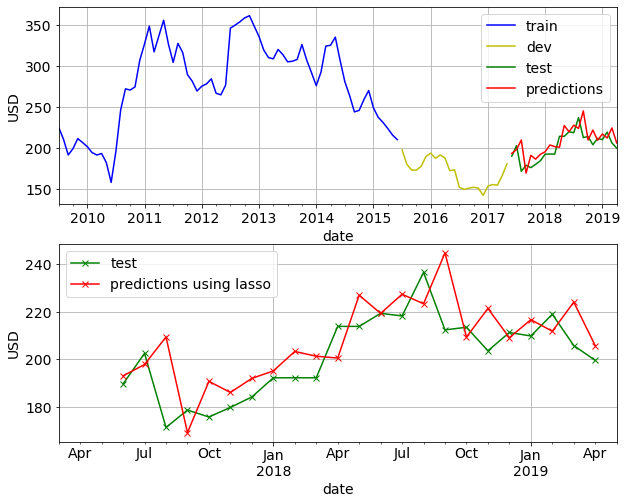

In [99]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
fig, (ax1, ax2) = plt.subplots(2,1)
est_df = pd.DataFrame({'est': est, 
                       'y_sample': y_sample,
                       'date': test['date']})

ax1 = train.plot(x='date', y='Price', style='b-', grid=True ,ax=ax1)
ax1 = cv.plot(x='date', y='Price', style='y-', grid=True, ax=ax1)
ax1 = test.plot(x='date', y='Price', style='g-', grid=True, ax=ax1)
ax1 = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax1)
ax1.legend(['train', 'dev', 'test', 'predictions'])
ax1.set_xlabel("date")
ax1.set_ylabel("USD")

rcParams['figure.figsize'] = 10, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax2 = test.plot(x='date', y='Price', style='gx-', grid=True, ax=ax2)
ax2 = est_df.plot(x='date', y='est', style='rx-', grid=True, ax=ax2)
ax2.legend(['test', 'predictions using lasso'], loc='upper left')
ax2.set_xlabel("date")
ax2.set_ylabel("USD")
ax2.set_xlim([date(2017, 3, 1), date(2019, 5, 1)])



In [100]:
def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          alpha=1, \
                          max_iter=1000, \
                          l1_ratio=0.5):
    '''
    Train model, do prediction, scale back to original range and do evaluation
    Use XGBoost here.
    Inputs
        X_train_scaled     : features for training. Scaled to have mean 0 and variance 1
        y_train_scaled     : target for training. Scaled to have mean 0 and variance 1
        X_test_scaled      : features for test. Each sample is scaled to mean 0 and variance 1
        y_test             : target for test. Actual values, not scaled.
        col_mean           : means used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        col_std            : standard deviations used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        seed               : model seed
        n_estimators       : number of boosted trees to fit
        max_depth          : maximum tree depth for base learners
        learning_rate      : boosting learning rate (xgb’s “eta”)
        min_child_weight   : minimum sum of instance weight(hessian) needed in a child
        subsample          : subsample ratio of the training instance
        colsample_bytree   : subsample ratio of columns when constructing each tree
        colsample_bylevel  : subsample ratio of columns for each split, in each level
        gamma              : 
    Outputs
        rmse               : root mean square error of y_test and est
        mape               : mean absolute percentage error of y_test and est
        est                : predicted values. Same length as y_test
    '''

    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,max_iter=max_iter,random_state=0)
    
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

In [101]:
param_label = 'alpha'
param_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

param2_label = 'l1_ratio'
param2_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]



error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Price_mean'],
                                     cv['Price_std'],
                                     alpha=param, 
                                     l1_ratio=param2)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   


Minutes taken = 0.005787964661916097


,alpha,l1_ratio,rmse,mape_pct
0,0.1,0.1,13.492325,6.056109
1,0.1,0.2,13.435860,6.018780
2,0.1,0.3,13.436730,6.016460
3,0.1,0.4,13.458842,6.027452
4,0.1,0.5,13.481400,6.038427
5,0.1,0.6,13.508324,6.047817
6,0.1,0.7,13.538964,6.058844
7,0.1,0.8,13.582507,6.073089
8,0.1,0.9,13.632730,6.089065
9,0.1,1.0,13.686952,6.103081


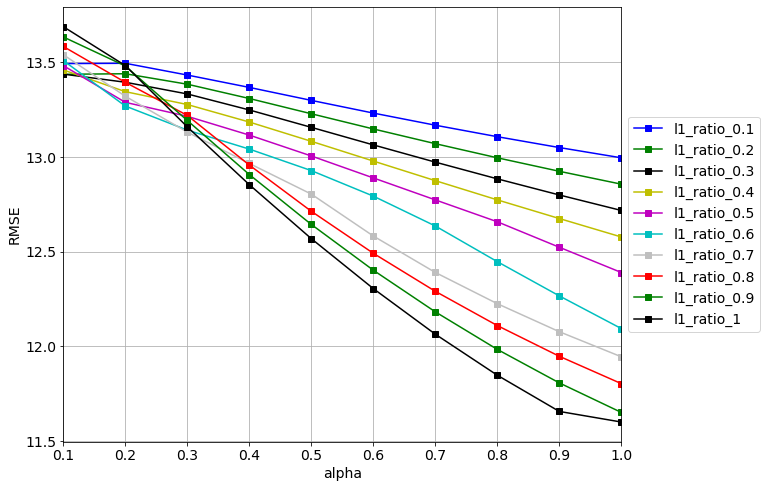

In [102]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [103]:
rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Price_mean'],
                                     cv['Price_std'],
                                     alpha=1, 
                                     max_iter=1000,
                                     l1_ratio=1)
rmse, mape

(11.60153728569208, 5.364916897527676)